<a href="https://colab.research.google.com/github/AlexTrompter/Pump-Analysis-for-Turbomachinery-Class/blob/main/Abgabe_Str%C3%B6mungsmaschinen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:
If an efficiency of 83.1% is assumed, the total electrical energy used by the pump is 405.31 kWh
Task 2:
The average efficiency is 69.8%
If the actual efficiency of 69.8% of the pump is used, the total electrical energy used by the pump is 482.60 kWh
Task 3:
The hydraulic energy provided by the pump is 336.81 kWh
The unused energy is 145.80 kWh
Task 4:


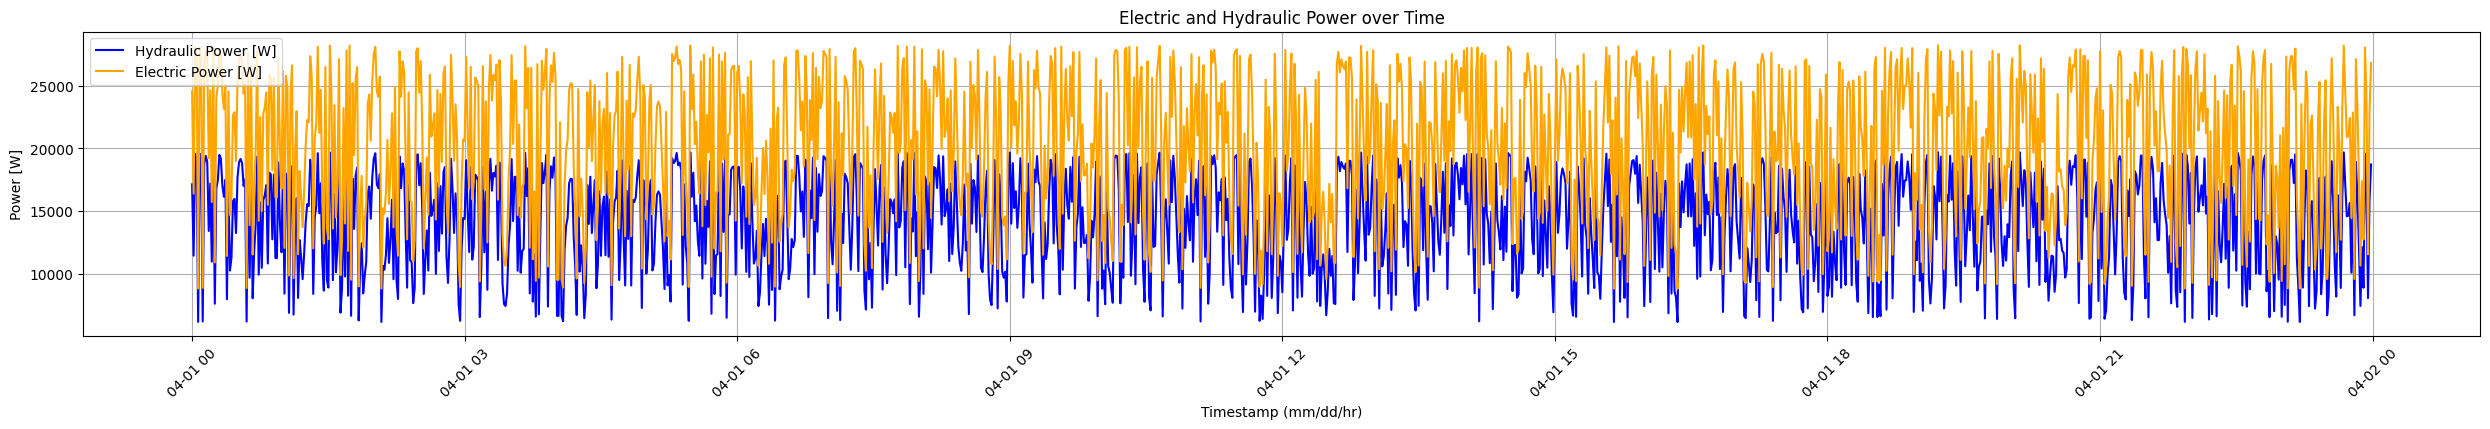

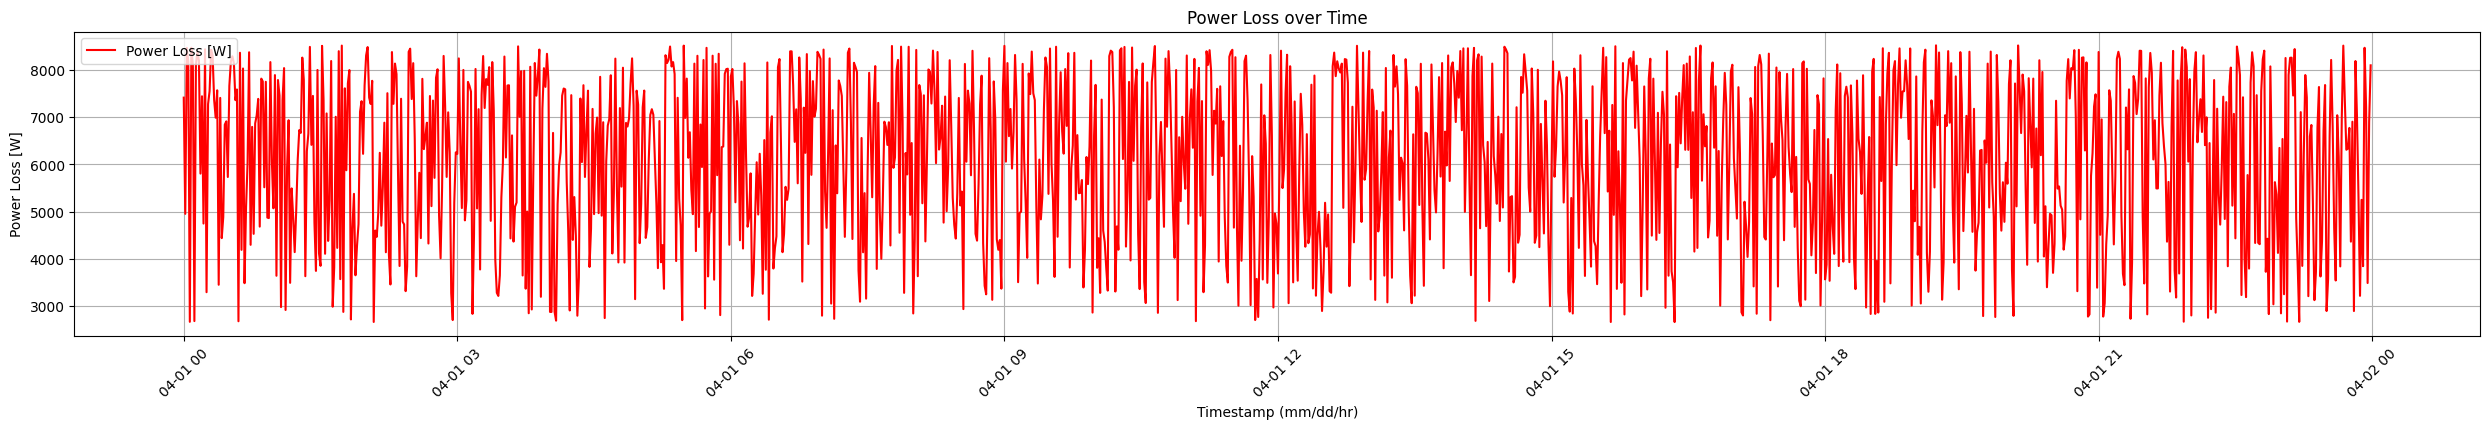

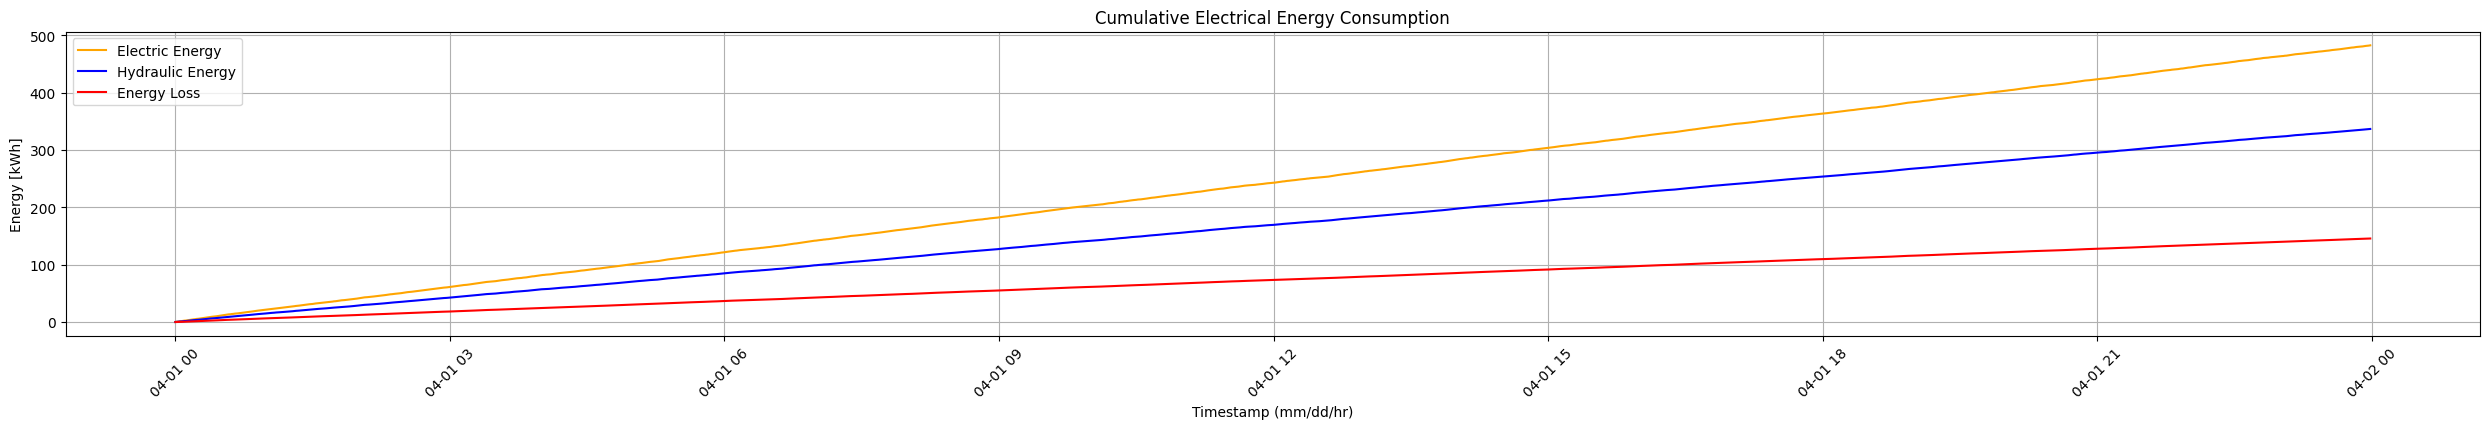

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/AlexTrompter/Pump-Analysis-for-Turbomachinery-Task/refs/heads/main/volume_flow_data.csv')

#Impeller diameter = 264mm

#creates number arrays for interpolation of height values
flow = np.array([90, 110, 240, 300, 350, 460, 500, 555]) # x-axis
height = np.array([23.5, 23, 22, 21, 20, 17, 16, 14.5]) #y-axis

##############################################
###Task 1: Calculate the Energy consumption###
##############################################
print("Task 1:")

#creates an array for the interpolated values respective to the pump data provided in the csv
interpolated_heights = []           #creates an empty list for interpolation

for q in df['Volume Flow (m^3/h)']:
    h = np.interp(q, flow, height)  #interpolating as h
    interpolated_heights.append(h)  #saving the values into the list

interpolated_heights_array = np.array(interpolated_heights) #changing the list into an array

rho = 969   #kg/m^3
            #rho is given in the provided data sheet (pg.1)
g = 9.81    #m/s^2

efficiency_est = 0.831  #Efficiency is estimated in the data sheet at 83.1%
                      #Since calculation is from output to input, the efficiency needs to be inverted


flow_s = df['Volume Flow (m^3/h)'].values / 3600  #creates a new array for the flow rates in m^3/s

P_hydr_raw = rho * g * flow_s * interpolated_heights_array #calculates the hydraulic power for each step
P_elec_raw = P_hydr_raw * 1/efficiency_est

P_hydr = np.round(P_hydr_raw, 1)                        #W
P_elec = np.round(P_elec_raw, 1)                        #W

#time difference for every values is 60 seconds -> Assume, that those values remain constant over the interval
delta = 60                                              #s

input_energy_joule = np.sum(P_elec * delta)             #J
input_energy_kilojoule = input_energy_joule / 1000      #kJ
input_energy_kWh = input_energy_kilojoule / 3600        #kWh

#Give out a result with the total electrical energy consumed by the pump
print(f"If an efficiency of 83.1% is assumed, the total electrical energy used by the pump is {input_energy_kWh:.2f} kWh")

###############################################
###Task 2: Determine average pump efficiency###
###############################################
print("Task 2:")

flow_eff = np.array([80, 100, 200, 300, 350, 400, 450, 500])
efficiency = np.array([0.34, 0.4, 0.65, 0.8, 0.83, 0.86, 0.87, 0.84])

eff = []

for l in df['Volume Flow (m^3/h)']:
    e = np.interp(l, flow_eff, efficiency)  #interpolating as e
    eff.append(e)  #saving the values into the list

interpolated_efficiency = np.array(eff) #changing the list into an array

#Calculate the actual average efficiency of the pump
average_efficiency = np.mean(interpolated_efficiency)

#Convert the Value of the mean efficiency from decimal to percentual
average_efficiency_per = average_efficiency * 100
average_efficiency_per = np.round(average_efficiency_per, 1)
print(f"The average efficiency is {average_efficiency_per:.1f}%")

P_elec_new = P_hydr_raw * 1/average_efficiency              #W
P_elec_new = np.round(P_elec_new, 1)                        #W
input_energy_joule_new = np.sum(P_elec_new * delta)         #J
input_energy_kilojoule_new = input_energy_joule_new / 1000  #kJ
input_energy_kWh_new = input_energy_kilojoule_new / 3600    #kWh

#Give out a result with the total electrical energy consumed by the pump
print(f"If the actual efficiency of {average_efficiency_per:.1f}% of the pump is used, the total electrical energy used by the pump is {input_energy_kWh_new:.2f} kWh")

#####################################
###Task 3: Calculate unused energy###
#####################################
print("Task 3:")

#Unused Energy can be calculated by subtracting the hydraulic energy from the electric energy
hydr_energy_joule = np.sum(P_hydr * delta)          #J
hydr_energy_kilojoule = hydr_energy_joule / 1000    #kJ
hydr_energy_kWh = hydr_energy_kilojoule / 3600      #kWh

print(f"The hydraulic energy provided by the pump is {hydr_energy_kWh:.2f} kWh")

unused_energy_kWh = input_energy_kWh_new - hydr_energy_kWh
print(f"The unused energy is {unused_energy_kWh:.2f} kWh")

#####################################
###Task 4: Add additional analyses###
#####################################
print("Task 4:")

import matplotlib.pyplot as plt

df = pd.read_csv(
    'https://raw.githubusercontent.com/AlexTrompter/Pump-Analysis-for-Turbomachinery-Task/refs/heads/main/volume_flow_data.csv',
    parse_dates=['Timestamp']
)

#The first graph to be created shows both the hydraulic and electrical power over time

plt.figure(figsize=(25, 4))
plt.plot(df['Timestamp'], P_hydr, label='Hydraulic Power [W]', color='blue')
plt.plot(df['Timestamp'], P_elec_new, label='Electric Power [W]', color='orange')
plt.title('Electric and Hydraulic Power over Time')
plt.xlabel('Timestamp (mm/dd/hr)')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#The second graph shows the difference of hydraulic and electrical power, the unused or lost power over time
#For that, a new array for power loss needs to be created

P_loss = P_elec_new - P_hydr
P_loss = np.round(P_loss, 1)

plt.figure(figsize=(25, 4))
plt.plot(df['Timestamp'], P_loss, label='Hydraulic Power [W]', color='red')
plt.title('Power Loss over Time')
plt.xlabel('Timestamp (mm/dd/hr)')
plt.ylabel('Power Loss [W]')
plt.legend(['Power Loss [W]'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#The third graph shows the accumulation of the total energy consumed by the pump

cumulative_energy_electric = np.cumsum(P_elec_new * delta) / 3.6e6                  #Conversion of power [W] into energy [kWh]
cumulative_energy_hydraulic = np.cumsum(P_hydr * delta) / 3.6e6                     #Conversion of power [W] into energy [kWh]
cumulative_energy_loss = cumulative_energy_electric - cumulative_energy_hydraulic   #[kWh]

plt.figure(figsize=(25, 4))
plt.plot(df['Timestamp'], cumulative_energy_electric, color='orange')
plt.plot(df['Timestamp'], cumulative_energy_hydraulic, color='blue')
plt.plot(df['Timestamp'], cumulative_energy_loss, color='red')
plt.title('Cumulative Electrical Energy Consumption')
plt.xlabel('Timestamp (mm/dd/hr)')
plt.ylabel('Energy [kWh]')
plt.legend(['Electric Energy', 'Hydraulic Energy', 'Energy Loss'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()